In [3]:
import numpy as np
import pandas as pd

all_name = ['id','class','1', '2', '3', '4', '5','6', '7','8', '9', '10',\
            '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',\
       '21', '22', '23', '24', '25', '26', '27','28', '29', '30']
raw_file = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework6/Homework 6 Data/wdbc.csv', names = all_name)
raw_file




,id,class,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


1_bi

In [5]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,\
f1_score,roc_auc_score,confusion_matrix,auc,roc_curve
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

raw_all_B = raw_file.loc[raw_file['class']=='B']
raw_all_M = raw_file.loc[raw_file['class']=='M']



[[165   4]
 [  1 284]]
 


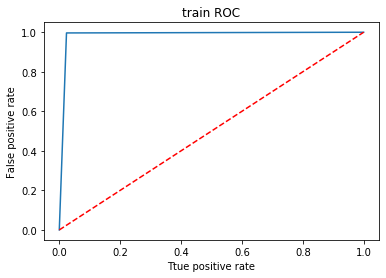

[[39  4]
 [ 0 72]]
 


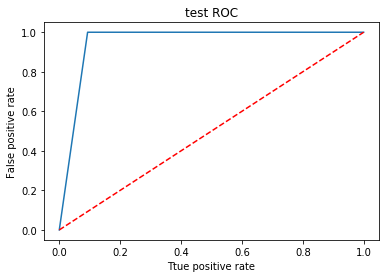

average_accuracy_train is:  0.9835535976505142
precision_train is:  0.9822900791486678
recall_train is:  0.9916959064327486
F_score_train is:  0.9869648259926563
auc_train is:  0.9807591958199247


average_accuracy_test is:  0.9652173913043477
precision_test is:  0.9709481731523092
recall_test is:  0.9740740740740738
F_score_test is:  0.972282442455355
auc_test is:  0.9622308354866492


In [87]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


average_accuracy_train = []
precision_train = []
recall_train = []
F_score_train = []
auc_train = []

average_accuracy_test = []
precision_test = []
recall_test = []
F_score_test = []
auc_test = []


for i in range(1,31):

    X_train_B, X_test_B = train_test_split(raw_all_B, test_size=0.2, random_state=i)
    X_train_M, X_test_M = train_test_split(raw_all_M, test_size=0.2, random_state=i)
    X_train_all = pd.concat([X_train_B,X_train_M],axis=0,ignore_index=True)
    X_test_all = pd.concat([X_test_B,X_test_M],axis=0,ignore_index=True)

    y_train = X_train_all['class']
    X_train = X_train_all.drop(['class','id'], axis=1)
    y_test = X_test_all['class']
    X_test = X_test_all.drop(['class','id'], axis=1)

    train_name = X_train.columns.values.tolist()

    X_train = preprocessing.normalize(X_train)
    X_test = preprocessing.normalize(X_test)

    X_train_normalized = pd.DataFrame(X_train, columns=train_name)
    X_test_normalized = pd.DataFrame(X_test, columns=train_name) 

    '''transfer B to 1, M to 0'''
    y_train=np.array([1 if i == 'B' else 0 for i in y_train])
    y_test=np.array([1 if i == 'B' else 0 for i in y_test])
    
    
    cv_5 = KFold(n_splits = 5)
    params = {'C':np.logspace(-4,5,9)}
    #params = {'C':[10**i for i in range(-3,7)]}


    LSVC = LinearSVC(penalty='l1', dual=False)
    model_bi = GridSearchCV(LSVC, params, cv=cv_5,scoring='accuracy')
    
    model_bi.fit(X_train_normalized, y_train)
    predict_train = model_bi.predict(X_train_normalized)
    predict_test = model_bi.predict(X_test_normalized)

    
    '''train'''
    average_accuracy_train.append(accuracy_score(y_train,predict_train))
    precision_train.append(precision_score(y_train,predict_train,pos_label=1))
    recall_train.append(recall_score(y_train,predict_train,pos_label=1))
    F_score_train.append(f1_score(y_train,predict_train,pos_label=1))
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train,predict_train,pos_label=1)
    auc_train.append(auc(fpr_train, tpr_train))

    
    '''test'''
    average_accuracy_test.append(accuracy_score(y_test,predict_test))
    precision_test.append(precision_score(y_test,predict_test,pos_label=1))
    recall_test.append(recall_score(y_test,predict_test,pos_label=1))
    F_score_test.append(f1_score(y_test,predict_test,pos_label=1))
    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test,predict_test,pos_label=1)
    auc_test.append(auc(fpr_test, tpr_test))
    
    '''test matrix and ROC'''
    if i == 30:
        matrix_report = confusion_matrix(y_train, predict_train)
        print(matrix_report)
        fpr,tpr,thresholds = roc_curve(y_train,predict_train)

        print(' ')
        
        plt.title('train ROC')
        plt.xlabel('Ttue positive rate')
        plt.ylabel('False positive rate')
        plt.plot(fpr,tpr)
        plt.plot([0,1],[0,1],'--',color = 'red')
        plt.show()
        
        
        

        matrix_report = confusion_matrix(y_test, predict_test)
        print(matrix_report)
        fpr,tpr,thresholds = roc_curve(y_test,predict_test)

        print(' ')
        
        plt.title('test ROC')
        plt.xlabel('Ttue positive rate')
        plt.ylabel('False positive rate')
        plt.plot(fpr,tpr)
        plt.plot([0,1],[0,1],'--',color = 'red')
        plt.show()


average_accuracy_train = np.mean(np.array(average_accuracy_train))
precision_train = np.mean(np.array(precision_train))
recall_train = np.mean(np.array(recall_train))
F_score_train = np.mean(np.array(F_score_train))
auc_train = np.mean(np.array(auc_train))

average_accuracy_test = np.mean(np.array(average_accuracy_test))
precision_test = np.mean(np.array(precision_test))
recall_test = np.mean(np.array(recall_test))
F_score_test = np.mean(np.array(F_score_test))
auc_test = np.mean(np.array(auc_test))


print('average_accuracy_train is: ',average_accuracy_train)
print('precision_train is: ',precision_train)
print('recall_train is: ',recall_train)
print('F_score_train is: ',F_score_train)
print('auc_train is: ',auc_train)
print('\n')
print('average_accuracy_test is: ',average_accuracy_test)
print('precision_test is: ',precision_test)
print('recall_test is: ',recall_test)
print('F_score_test is: ',F_score_test)
print('auc_test is: ',auc_test)



1_bii

In [270]:
X_train_B, X_test_B = train_test_split(raw_all_B, test_size=0.2, random_state=i)
X_train_M, X_test_M = train_test_split(raw_all_M, test_size=0.2, random_state=i)

X_train_label_B, X_train_unlabel_B = train_test_split(X_train_B, test_size=0.5, random_state=i)
X_train_label_M, X_train_unlabel_M = train_test_split(X_train_M, test_size=0.5, random_state=i)


#50% B and M in train set

X_train_label = pd.concat([X_train_label_B,X_train_label_M],axis=0,ignore_index=True)

X_train_label_old = X_train_label.drop(['class'], axis=1)
y_train_label_old = X_train_label['class']

X_train_label_old_normalize = preprocessing.normalize(X_train_label_old)

cv_5 = KFold(n_splits = 5)
params = {'C':np.logspace(-4,5,9)}

LSVC = LinearSVC(penalty='l1', dual=False)
model_bii = GridSearchCV(LSVC, params, cv=cv_5,scoring='accuracy')
model_bii.fit(X_train_label_old_normalize, y_train_label_old)

best_C = model_bii.best_params_
best_C        

{'C': 100000.0}

[[175   1]
 [  1 277]]
 


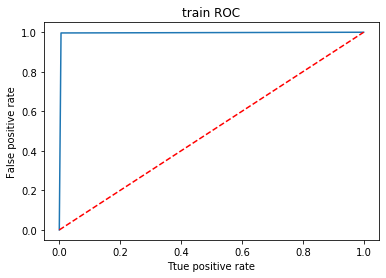

[[41  2]
 [ 1 71]]
 


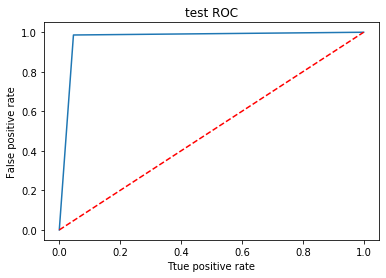

average_accuracy_train is:  0.9958149779735682
precision_train is:  0.994778828780782
recall_train is:  0.9985838923761985
F_score_train is:  0.9966716118607535
auc_train is:  0.9948524407201161


average_accuracy_test is:  0.9652173913043479
precision_test is:  0.9693581547890773
recall_test is:  0.9759259259259259
F_score_test is:  0.9723415163447996
auc_test is:  0.9616063738156762


In [402]:


average_accuracy_train = []
precision_train = []
recall_train = []
F_score_train = []
auc_train = []

average_accuracy_test = []
precision_test = []
recall_test = []
F_score_test = []
auc_test = []


for i in range(1,31):

    X_train_B, X_test_B = train_test_split(raw_all_B, test_size=0.2, random_state=i)
    X_train_M, X_test_M = train_test_split(raw_all_M, test_size=0.2, random_state=i)
    
    X_train_label_B, X_train_unlabel_B = train_test_split(X_train_B, test_size=0.5, random_state=i)
    X_train_label_M, X_train_unlabel_M = train_test_split(X_train_M, test_size=0.5, random_state=i)
    
    
    #50% B and M in train set
    #normalize label and unlabel
    X_train_label = pd.concat([X_train_label_B,X_train_label_M],axis=0,ignore_index=True)
    label_len = X_train_label.shape[0]
    X_train_unlabel = pd.concat([X_train_unlabel_B,X_train_unlabel_M],axis=0,ignore_index=True)
    unlabel_len = X_train_unlabel.shape[0]
    X_all_nol = pd.concat([X_train_label,X_train_unlabel],axis=0,ignore_index=True)
    
    X_all_nol_id = X_all_nol['id']
    X_all_nol_class = X_all_nol['class']
    X_all_nol = X_all_nol.drop(['id','class'],axis=1)
    nol_name = X_all_nol.columns.values.tolist()
    X_all_nol = preprocessing.normalize(X_all_nol)
    X_all_nol_normalized = pd.DataFrame(X_all_nol, columns=nol_name)
    
    X_all_nol_normalized.insert(0,'class',X_all_nol_class)
    X_all_nol_normalized.insert(0,'id',X_all_nol_id)
    
    X_train_label = X_all_nol_normalized[:label_len]
    X_train_unlabel = X_all_nol_normalized[label_len:]    
    X_train_label = X_train_label.reset_index(drop=True)
    X_train_unlabel = X_train_unlabel.reset_index(drop=True)
    
    
    
    X_train_all = pd.concat([X_train_B,X_train_M],axis=0,ignore_index=True)
    X_test_all = pd.concat([X_test_B,X_test_M],axis=0,ignore_index=True)

    
    #set to train set and label set
    X_train_label = X_train_label.drop(['id'], axis=1)
    X_train_unlabel = X_train_unlabel.drop(['id'], axis=1)
    
    #test set
    y_test = X_test_all['class']
    X_test = X_test_all.drop(['class','id'], axis=1)
    
    X_train_unlabel_old = X_train_unlabel.drop(['class'], axis=1)

    #for time in range(0,len(X_train_unlabel_old)):
    while len(X_train_unlabel_old)>0:
        
        X_train_label_old = X_train_label.drop(['class'], axis=1)
        y_train_label_old = X_train_label['class']

        
        cv_5 = KFold(n_splits = 5)
        params = {'C':np.logspace(-4,5,9)}

        #model_bii = LinearSVC(penalty='l1', C=100000, dual=False)
        LSVC = LinearSVC(penalty='l1', dual=False)
        model_bii = GridSearchCV(LSVC, params, cv=cv_5,scoring='accuracy')
        model_bii.fit(X_train_label_old, y_train_label_old)
        
        
        #print(model_bii.predict(X_train_unlabel_old))
        #get farthest point
        distance = abs(model_bii.decision_function(X_train_unlabel_old))
        idx = (list(distance)).index(max(distance))
        
        
        label_name = X_train_label_old.columns.values.tolist()
        add_train_data = pd.DataFrame(np.array(X_train_unlabel_old.iloc[idx]).reshape(1, -1),columns=label_name)

        X_train_unlabel_old = X_train_unlabel_old.drop([idx])
        
        #reindex
        X_train_unlabel_old = X_train_unlabel_old.reset_index(drop=True)
        
        predict_add_label = model_bii.predict(add_train_data)
        add_train_data.insert(0,'class',predict_add_label[0])
        X_train_label = pd.concat([X_train_label,add_train_data],axis=0,ignore_index=True)


    
    X_train = X_train_label.drop(['class'], axis=1)
    y_train = X_train_label['class']
    
    train_name = X_train.columns.values.tolist()

    X_test = preprocessing.normalize(X_test)

    X_test = pd.DataFrame(X_test, columns=train_name) 

    '''transfer B to 1, M to 0'''
    y_train=np.array([1 if i == 'B' else 0 for i in y_train])
    y_test=np.array([1 if i == 'B' else 0 for i in y_test])
    
    
    cv_5 = KFold(n_splits = 5)
    #params = {'C':np.logspace(-4,5,9)}
    #params = {'C':[10**i for i in range(-3,7)]}
    params = {'C': [100000.0,1]}

    LSVC = LinearSVC(penalty='l1', dual=False)
    model_bii22 = GridSearchCV(LSVC, params, cv=cv_5,scoring='accuracy')
    
    model_bii22.fit(X_train, y_train)
    predict_train = model_bii22.predict(X_train)
    predict_test = model_bii22.predict(X_test)

    
    '''train'''
    average_accuracy_train.append(accuracy_score(y_train,predict_train))
    precision_train.append(precision_score(y_train,predict_train,pos_label=1))
    recall_train.append(recall_score(y_train,predict_train,pos_label=1))
    F_score_train.append(f1_score(y_train,predict_train,pos_label=1))
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train,predict_train,pos_label=1)
    auc_train.append(auc(fpr_train, tpr_train))

    
    '''test'''
    average_accuracy_test.append(accuracy_score(y_test,predict_test))
    precision_test.append(precision_score(y_test,predict_test,pos_label=1))
    recall_test.append(recall_score(y_test,predict_test,pos_label=1))
    F_score_test.append(f1_score(y_test,predict_test,pos_label=1))
    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test,predict_test,pos_label=1)
    auc_test.append(auc(fpr_test, tpr_test))
    
    '''test matrix and ROC'''
    if i == 30:
        matrix_report = confusion_matrix(y_train, predict_train)
        print(matrix_report)
        fpr,tpr,thresholds = roc_curve(y_train,predict_train)

        print(' ')
        
        plt.title('train ROC')
        plt.xlabel('Ttue positive rate')
        plt.ylabel('False positive rate')
        plt.plot(fpr,tpr)
        plt.plot([0,1],[0,1],'--',color = 'red')
        plt.show()
        
        
        

        matrix_report = confusion_matrix(y_test, predict_test)
        print(matrix_report)
        fpr,tpr,thresholds = roc_curve(y_test,predict_test)

        print(' ')
        
        plt.title('test ROC')
        plt.xlabel('Ttue positive rate')
        plt.ylabel('False positive rate')
        plt.plot(fpr,tpr)
        plt.plot([0,1],[0,1],'--',color = 'red')
        plt.show()


average_accuracy_train = np.mean(np.array(average_accuracy_train))
precision_train = np.mean(np.array(precision_train))
recall_train = np.mean(np.array(recall_train))
F_score_train = np.mean(np.array(F_score_train))
auc_train = np.mean(np.array(auc_train))

average_accuracy_test = np.mean(np.array(average_accuracy_test))
precision_test = np.mean(np.array(precision_test))
recall_test = np.mean(np.array(recall_test))
F_score_test = np.mean(np.array(F_score_test))
auc_test = np.mean(np.array(auc_test))


print('average_accuracy_train is: ',average_accuracy_train)
print('precision_train is: ',precision_train)
print('recall_train is: ',recall_train)
print('F_score_train is: ',F_score_train)
print('auc_train is: ',auc_train)
print('\n')
print('average_accuracy_test is: ',average_accuracy_test)
print('precision_test is: ',precision_test)
print('recall_test is: ',recall_test)
print('F_score_test is: ',F_score_test)
print('auc_test is: ',auc_test)



1_biii

if we want that the argorithm was not trapped in a local minimum, we can repeat kmean for several or more times.

[[131  38]
 [ 10 275]]
 


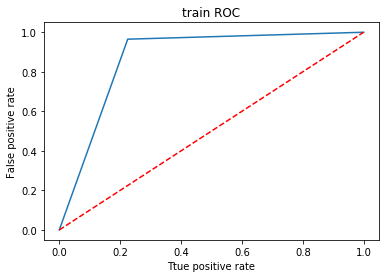

average_accuracy_train is:  0.886637298091043
precision_train is:  0.858974084077943
recall_train is:  0.9805847953216374
F_score_train is:  0.9157090094835106
auc_train is:  0.8543949617633829




In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from collections import Counter

average_accuracy_train = []
precision_train = []
recall_train = []
F_score_train = []
auc_train = []

for i in range(1,31):

    X_train_B, X_test_B = train_test_split(raw_all_B, test_size=0.2, random_state=i)
    X_train_M, X_test_M = train_test_split(raw_all_M, test_size=0.2, random_state=i)
    X_train_all = pd.concat([X_train_B,X_train_M],axis=0,ignore_index=True)
    X_test_all = pd.concat([X_test_B,X_test_M],axis=0,ignore_index=True)
    #
    X_train_all = (X_train_all.drop(['id'], axis=1))
    X_test_all = X_test_all.drop(['id'], axis=1)
    
    y_train = X_train_all['class']
    X_train = X_train_all.drop(['class'], axis=1)
    y_test = X_test_all['class']
    X_test = X_test_all.drop(['class'], axis=1)
    nol_name = X_train.columns.values.tolist()
    
    X_train_normalize = preprocessing.normalize(X_train, axis=1)
    X_test_normalize = preprocessing.normalize(X_test, axis=1)

    X_train_normalize = pd.DataFrame(X_train_normalize, columns=nol_name)
    X_test_normalize = pd.DataFrame(X_test_normalize, columns=nol_name)
    
    X_train_normalize.insert(0,'class',X_train_all['class'])
    X_test_normalize.insert(0,'class',X_test_all['class'])
    
    X_train_all = X_train_normalize
    X_test_all = X_test_normalize
    #
    #X_train_all = X_train_all.drop(['id'], axis=1)
    y_train = X_train_all['class']
    X_train = X_train_all.drop(['class'], axis=1)
    
    #kmean
    kmeans = KMeans(n_clusters=2, random_state=i)
    y_cluster_label = kmeans.fit_predict(X_train)
    
    cluster_center = kmeans.cluster_centers_
    
    X_train_all.insert(31,'newlabel',y_cluster_label)
    #X_train_all = X_train_all.drop(['class'], axis=1)
    
    
    name = X_train_all.columns.values.tolist()
    add_ycluster_np= np.array(X_train_all)
    

    distance_1_list = []
    distance_0_list = []
    order_0 = []
    order_1 = []
    
    # every data distance to center
    for c in range(0,add_ycluster_np.shape[0]):
        distance = euclidean_distances(np.array(add_ycluster_np[c,1:-1]).reshape(1, -1),np.array(cluster_center[0]).reshape(1, -1))
        distance_0_list.append(float(distance))
        
    for c in range(0,add_ycluster_np.shape[0]):
        distance = euclidean_distances(np.array(add_ycluster_np[c,1:-1]).reshape(1, -1),np.array(cluster_center[1]).reshape(1, -1))
        distance_1_list.append(float(distance))
       
    order_0 = order_0+distance_0_list
    order_1 = order_1+distance_1_list
    order_0.sort()
    order_1.sort()
    
    index_0_list = []
    index_1_list = []
    
    for b in range(0,30):
        index_0_list.append(distance_0_list.index(order_0[b]))
        index_1_list.append(distance_1_list.index(order_1[b]))
    
    cluster_0 = X_train_all.iloc[index_0_list]
    cluster_1 = X_train_all.iloc[index_1_list]
    cluster_0_label = Counter(cluster_0['class']).most_common()[0][0]
    cluster_1_label = Counter(cluster_1['class']).most_common()[0][0]
    
    predict_train = np.array([cluster_0_label if i == 0 else cluster_1_label for i in y_cluster_label])
    predict_train = np.array([1 if i == 'B' else 0 for i in predict_train])
    y_train = np.array([1 if i == 'B' else 0 for i in y_train])
 


    average_accuracy_train.append(accuracy_score(y_train,predict_train))
    precision_train.append(precision_score(y_train,predict_train,pos_label=1))
    recall_train.append(recall_score(y_train,predict_train,pos_label=1))
    F_score_train.append(f1_score(y_train,predict_train,pos_label=1))
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train,predict_train,pos_label=1)
    auc_train.append(auc(fpr_train, tpr_train))

    if i == 1:
        matrix_report = confusion_matrix(y_train, predict_train)
        print(matrix_report)
        fpr,tpr,thresholds = roc_curve(y_train,predict_train)

        print(' ')

        plt.title('train ROC')
        plt.xlabel('Ttue positive rate')
        plt.ylabel('False positive rate')
        plt.plot(fpr,tpr)
        plt.plot([0,1],[0,1],'--',color = 'red')
        plt.show()


average_accuracy_train = np.mean(np.array(average_accuracy_train))
precision_train = np.mean(np.array(precision_train))
recall_train = np.mean(np.array(recall_train))
F_score_train = np.mean(np.array(F_score_train))
auc_train = np.mean(np.array(auc_train))


print('average_accuracy_train is: ',average_accuracy_train)
print('precision_train is: ',precision_train)
print('recall_train is: ',recall_train)
print('F_score_train is: ',F_score_train)
print('auc_train is: ',auc_train)
print('\n')


[[29 14]
 [ 1 71]]
 


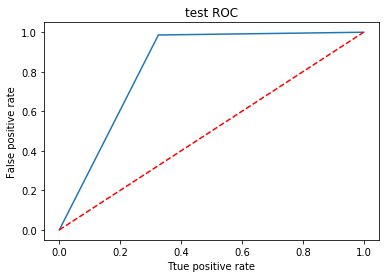

average_accuracy_test is:  0.890144927536232
precision_test is:  0.8617661588956186
recall_test is:  0.9837962962962962
F_score_test is:  0.9184417477071565
auc_test is:  0.8585648148148146


In [82]:
average_accuracy_test = []
precision_test = []
recall_test = []
F_score_test = []
auc_test = []

for i in range(1,31):

    X_train_B, X_test_B = train_test_split(raw_all_B, test_size=0.2, random_state=i)
    X_train_M, X_test_M = train_test_split(raw_all_M, test_size=0.2, random_state=i)
    X_train_all = pd.concat([X_train_B,X_train_M],axis=0,ignore_index=True)
    X_test_all = pd.concat([X_test_B,X_test_M],axis=0,ignore_index=True)
    
    ###
    X_train_all = (X_train_all.drop(['id'], axis=1))
    X_test_all = X_test_all.drop(['id'], axis=1)
    
    y_train = X_train_all['class']
    X_train = X_train_all.drop(['class'], axis=1)
    y_test = X_test_all['class']
    X_test = X_test_all.drop(['class'], axis=1)
    nol_name = X_train.columns.values.tolist()
    
    X_train_normalize = preprocessing.normalize(X_train, axis=1)
    X_test_normalize = preprocessing.normalize(X_test, axis=1)

    X_train_normalize = pd.DataFrame(X_train_normalize, columns=nol_name)
    X_test_normalize = pd.DataFrame(X_test_normalize, columns=nol_name)
    
    X_train_normalize.insert(0,'class',X_train_all['class'])
    X_test_normalize.insert(0,'class',X_test_all['class'])
    
    X_train_all = X_train_normalize
    X_test_all = X_test_normalize
    ###

    #X_train_all = X_train_all.drop(['id'], axis=1)
    y_train = X_train_all['class']
    X_train = X_train_all.drop(['class'], axis=1)
    
    #X_test_all = X_test_all.drop(['id'], axis=1)
    y_test = X_test_all['class']
    X_test = X_test_all.drop(['class'], axis=1)
    
    #kmean
    kmeans = KMeans(n_clusters=2, random_state=i)
    kmeans.fit(X_train)
    y_cluster_label = kmeans.predict(X_test)
    
    cluster_center = kmeans.cluster_centers_
    
    X_test_all.insert(31,'newlabel',y_cluster_label)
    #X_train_all = X_train_all.drop(['class'], axis=1)
    
    
    name = X_test_all.columns.values.tolist()
    add_ycluster_np= np.array(X_test_all)
    
    
    cluster_0 = X_test_all[X_test_all['newlabel']==0]
    cluster_1 = X_test_all[X_test_all['newlabel']==1]
    
    cluster_0_label = Counter(cluster_0['class']).most_common()[0][0]
    cluster_1_label = Counter(cluster_1['class']).most_common()[0][0]
    
    predict_test = np.array([cluster_0_label if i == 0 else cluster_1_label for i in y_cluster_label])
    predict_test = np.array([1 if i == 'B' else 0 for i in predict_test])
    y_test = np.array([1 if i == 'B' else 0 for i in y_test])
 


    '''test'''
    average_accuracy_test.append(accuracy_score(y_test,predict_test))
    precision_test.append(precision_score(y_test,predict_test,pos_label=1))
    recall_test.append(recall_score(y_test,predict_test,pos_label=1))
    F_score_test.append(f1_score(y_test,predict_test,pos_label=1))
    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test,predict_test,pos_label=1)
    auc_test.append(auc(fpr_test, tpr_test))
    
    '''test matrix and ROC'''
    if i == 30:
        matrix_report = confusion_matrix(y_test, predict_test)
        print(matrix_report)
        fpr,tpr,thresholds = roc_curve(y_test,predict_test)

        print(' ')
        
        plt.title('test ROC')
        plt.xlabel('Ttue positive rate')
        plt.ylabel('False positive rate')
        plt.plot(fpr,tpr)
        plt.plot([0,1],[0,1],'--',color = 'red')
        plt.show()


average_accuracy_test = np.mean(np.array(average_accuracy_test))
precision_test = np.mean(np.array(precision_test))
recall_test = np.mean(np.array(recall_test))
F_score_test = np.mean(np.array(F_score_test))
auc_test = np.mean(np.array(auc_test))


print('average_accuracy_test is: ',average_accuracy_test)
print('precision_test is: ',precision_test)
print('recall_test is: ',recall_test)
print('F_score_test is: ',F_score_test)
print('auc_test is: ',auc_test)



i_biv

[[32 11]
 [ 0 72]]
 


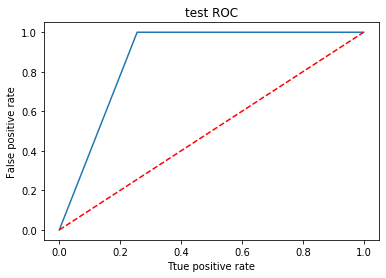

average_accuracy_test is:  0.6656381486676016
precision_test is:  0.626863167864152
recall_test is:  0.7034050179211471
F_score_test is:  0.660956094466567
auc_test is:  0.6529028090355923


In [77]:
from sklearn.cluster import SpectralClustering
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,precision_score,recall_score,\
f1_score,roc_auc_score,confusion_matrix,auc,roc_curve
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


average_accuracy_train = []
precision_train = []
recall_train = []
F_score_train = []
auc_train = []

average_accuracy_test = []
precision_test = []
recall_test = []
F_score_test = []
auc_test = []


for i in range(1,32):

    X_train_B, X_test_B = train_test_split(raw_all_B, test_size=0.2, random_state=i)
    X_train_M, X_test_M = train_test_split(raw_all_M, test_size=0.2, random_state=i)
    X_train_all = pd.concat([X_train_B,X_train_M],axis=0,ignore_index=True)
    X_test_all = pd.concat([X_test_B,X_test_M],axis=0,ignore_index=True)
    
    X_train_all = (X_train_all.drop(['id'], axis=1))
    X_test_all = X_test_all.drop(['id'], axis=1)
    
    y_train = X_train_all['class']
    X_train = X_train_all.drop(['class'], axis=1)
    y_test = X_test_all['class']
    X_test = X_test_all.drop(['class'], axis=1)
    nol_name = X_train.columns.values.tolist()
    
    X_train_normalize = preprocessing.normalize(X_train, axis=1)
    X_test_normalize = preprocessing.normalize(X_test, axis=1)

    X_train_normalize = pd.DataFrame(X_train_normalize, columns=nol_name)
    X_test_normalize = pd.DataFrame(X_test_normalize, columns=nol_name)
    
    X_train_normalize.insert(0,'class',X_train_all['class'])
    X_test_normalize.insert(0,'class',X_test_all['class'])
    
    X_train_all = X_train_normalize
    X_test_all = X_test_normalize
    
    y_train = X_train_all['class']
    X_train = X_train_all.drop(['class'], axis=1)
    y_test = X_test_all['class']
    X_test = X_test_all.drop(['class'], axis=1)


    model_sp = SpectralClustering(n_clusters=2, affinity='rbf', random_state=10)
    #model_sp.fit(X_train)
   
    #y_cluster_label = model_sp.labels_
    y_cluster_label = model_sp.fit_predict(X_train)

    X_train_all.insert(31,'newlabel',y_cluster_label)
    
    #X_train_all = X_train_all.drop(['class'], axis=1)
    
    
    name = X_train_all.columns.values.tolist()
    #add_ycluster_np= np.array(X_test_all)
    
    
    cluster_0 = X_train_all[X_train_all['newlabel']==0]
    cluster_1 = X_train_all[X_train_all['newlabel']==1]
    
    cluster_0_label = Counter(cluster_0['class']).most_common()[0][0]
    cluster_1_label = Counter(cluster_1['class']).most_common()[0][0]
    
    y_test_label = model_sp.fit_predict(X_test)
    
    predict_test = np.array([cluster_0_label if i == 0 else cluster_1_label for i in y_test_label])
    predict_test = np.array([1 if i == 'B' else 0 for i in predict_test])
    y_test = np.array([1 if i == 'B' else 0 for i in y_test])
    

    '''test'''
    average_accuracy_test.append(accuracy_score(y_test,predict_test))
    precision_test.append(precision_score(y_test,predict_test,pos_label=1))
    recall_test.append(recall_score(y_test,predict_test,pos_label=1))
    F_score_test.append(f1_score(y_test,predict_test,pos_label=1))
    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test,predict_test,pos_label=1)
    auc_test.append(auc(fpr_test, tpr_test))
    
    '''test matrix and ROC'''
    if i == 1:
        matrix_report = confusion_matrix(y_test, predict_test)
        print(matrix_report)
        fpr,tpr,thresholds = roc_curve(y_test,predict_test)

        print(' ')
        
        plt.title('test ROC')
        plt.xlabel('Ttue positive rate')
        plt.ylabel('False positive rate')
        plt.plot(fpr,tpr)
        plt.plot([0,1],[0,1],'--',color = 'red')
        plt.show()


average_accuracy_test = np.mean(np.array(average_accuracy_test))
precision_test = np.mean(np.array(precision_test))
recall_test = np.mean(np.array(recall_test))
F_score_test = np.mean(np.array(F_score_test))
auc_test = np.mean(np.array(auc_test))


print('average_accuracy_test is: ',average_accuracy_test)
print('precision_test is: ',precision_test)
print('recall_test is: ',recall_test)
print('F_score_test is: ',F_score_test)
print('auc_test is: ',auc_test)


    

    
    


1_bv

2. Active Learning Using Support Vector Machines

In [6]:
#file_2_name = ['1','2','3','4','class']
file_2_name = ["variance", "skewness", "curtosis", "entropy", "class"]

raw_file_2 = pd.read_csv('/Users/liyifan/Desktop/551552/homework/homework6/data_banknote_authentication.csv', names = file_2_name)
raw_file_2


,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
test_data = raw_file_2.sample(n=472,random_state=1,axis=0)
a=[2,3,4,5]
#train_data 
all_idx = raw_file_2.index
test_idx = list(test_data.index)
train_idx = list(all_idx)
for i in range(0,len(test_idx)):
    train_idx.remove(test_idx[i])

train_data = raw_file_2.iloc[train_idx]

test_data = test_data.reset_index(drop=True)
train_data = train_data.reset_index(drop=True)

train_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,0.32924,-4.45520,4.57180,-0.98880,0
4,4.36840,9.67180,-3.96060,-3.16250,0
...,...,...,...,...,...
895,-2.41000,3.74330,-0.40215,-1.29530,1
896,0.40614,1.34920,-1.45010,-0.55949,1
897,-1.38870,-4.87730,6.47740,0.34179,1
898,-3.56370,-8.38270,12.39300,-1.28230,1


In [8]:
test_data

,variance,skewness,curtosis,entropy,class
0,-3.5510,1.89550,0.186500,-2.440900,1
1,1.3114,4.54620,2.293500,0.225410,0
2,-4.0173,-8.31230,12.454700,-1.437500,1
3,-5.1190,6.64860,-0.049987,-6.520600,1
4,3.6289,0.81322,1.627700,0.776270,0
...,...,...,...,...,...
467,3.8962,-4.79040,3.395400,-0.537510,0
468,-2.9915,-6.62580,8.652100,1.819800,1
469,-0.2062,9.22070,-3.704400,-6.810300,0
470,2.2928,9.03860,-3.241700,-1.299100,0


2_bi

In [105]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from collections import Counter

X_test = test_data.drop(['class'],axis=1)
y_test = test_data['class']

cv_10 = KFold(n_splits = 10)

#params = {'C':[10**i for i in range(-3,7)]}
train_old_data = train_data

error_sum = {} 
for i in range(0,50):
    train_old_data = train_data
    error_list = []

    for b in range(0,90):
        
        #add_10_data = train_old_data.sample(n=10)
        count = 1
        while count==1:
            
            add_10_data = train_old_data.sample(n=10)
            count = len(Counter(add_10_data['class']).most_common())
           
        
#         train_old_data_idx = list(train_old_data.index)
#         add_idx = list(add_10_data.index)
#         for c in range(0,len(add_idx)):
#             train_old_data_idx.remove(add_idx[c])
#         train_old_data = train_old_data.iloc[train_old_data_idx]

        if b == 0:
            new_train_data = add_10_data
        else:
            new_train_data = pd.concat([new_train_data,add_10_data])
            
        train_old_data = train_old_data[~train_old_data.index.isin(new_train_data.index)] 
        
        X_train = new_train_data.drop(['class'],axis=1)
        y_train = new_train_data['class']

        params = {'C':np.logspace(-4,5,9)}
        LSVC = LinearSVC(penalty='l1', dual=False)
        model_2i = GridSearchCV(LSVC, params, cv=cv_10,scoring='accuracy')
        model_2i.fit(X_train,y_train)
        score = model_2i.score(X_test,y_test)
        error = 1-score
        error_list.append(error)
    error_sum[i]=error_list
error_sum



{0: [0.08686440677966101,
  0.012711864406779627,
  0.012711864406779627,
  0.021186440677966156,
  0.014830508474576232,
  0.01906779661016944,
  0.01906779661016944,
  0.01906779661016944,
  0.008474576271186418,
  0.012711864406779627,
  0.012711864406779627,
  0.012711864406779627,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.014830508474576232,
  0.014830508474576232,
  0.01906779661016944,
  0.01906779661016944,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.008474576271186418,
  0.012711864406779627,
  0.012711864406779

2_bii

In [34]:
X_test = test_data.drop(['class'],axis=1)
y_test = test_data['class']

cv_10 = KFold(n_splits = 10)

#params = {'C':[10**i for i in range(-3,7)]}
train_old_data = train_data

error_sum_2 = {} 
for i in range(0,50):
    train_old_data = train_data
    error_list = []
    for b in range(0,90):
        if b==0:
            count = 1
            while count==1:
                add_10_data = train_old_data.sample(n=10)
                count = len(Counter(add_10_data['class']).most_common())
            new_train_data = add_10_data
            train_old_data_idx = list(train_old_data.index)
            add_idx = list(add_10_data.index)
            for c in range(0,len(add_idx)):
                train_old_data_idx.remove(add_idx[c])
            train_old_data = raw_file_2.iloc[train_old_data_idx]
           

        X_train = new_train_data.drop(['class'],axis=1)
        y_train = new_train_data['class']

        params = {'C':np.logspace(-4,5,9)}
        LSVC = LinearSVC(penalty='l1', dual=False)
        model_2ii = GridSearchCV(LSVC, params, cv=cv_10,scoring='accuracy')
        model_2ii.fit(X_train,y_train)
        score = model_2ii.score(X_test,y_test)
        error = 1-score
        error_list.append(error)

        if b!=89:
            distance = abs(model_2ii.decision_function(train_old_data.drop(['class'],axis=1)))
            order = distance.argsort()
            idx = order[0:10]
            add_10_data = train_old_data.iloc[idx]
            new_train_data = pd.concat([new_train_data,add_10_data])
            train_old_data = train_old_data[~train_old_data.index.isin(new_train_data.index)]

    error_sum_2[i]=error_list
error_sum_2


{0: [0.07415254237288138,
  0.0847457627118644,
  0.044491525423728806,
  0.021186440677966156,
  0.010593220338983023,
  0.010593220338983023,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.010593220338983023,
  0.010593220338983023,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.010593220338983023,
  0.010593220338983023,
  0.010593220338983023,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.021186440677966156,
  0.010593220338983023,
  0.010593220338

2_c

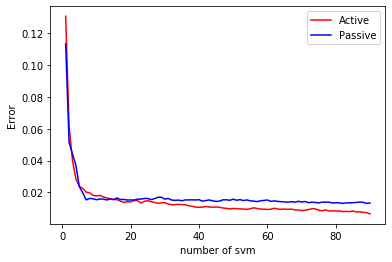

In [106]:
i_average_error = []
ii_average_err0r = []
count_dict = {}
count_dict2 = {}

count1 = []
count2 = []

for i in error_sum:
    if i == 0:
        for b in range(0,len(error_sum[i])):
            count_dict[b]=error_sum[i][b]
    else:
        for b in range(0,len(error_sum[i])):
            count_dict[b]=count_dict[b]+error_sum[i][b]

for i in error_sum_2:
    if i == 0:
        for b in range(0,len(error_sum_2[i])):
            count_dict2[b]=error_sum_2[i][b]
    else:
        for b in range(0,len(error_sum_2[i])):
            count_dict2[b]=count_dict2[b]+error_sum_2[i][b]
     
    
    
    
for i in count_dict:
    count1.append(count_dict[i]/50)

for i in count_dict2:
    count2.append(count_dict2[i]/50) 
        

x_number = []
for i in range(1,91):
    x_number.append(i)

plt.xlabel('number of svm')
plt.ylabel('Error')
plt.plot(x_number, count1, 'red', label="Active")
plt.plot(x_number, count2, 'blue', label="Passive")
plt.legend()
plt.show()  
        
        
        

The picture show that the active learning has better performance than passive learning in average test error.